<a href="https://colab.research.google.com/github/Poojithaz6/clinic-review-clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

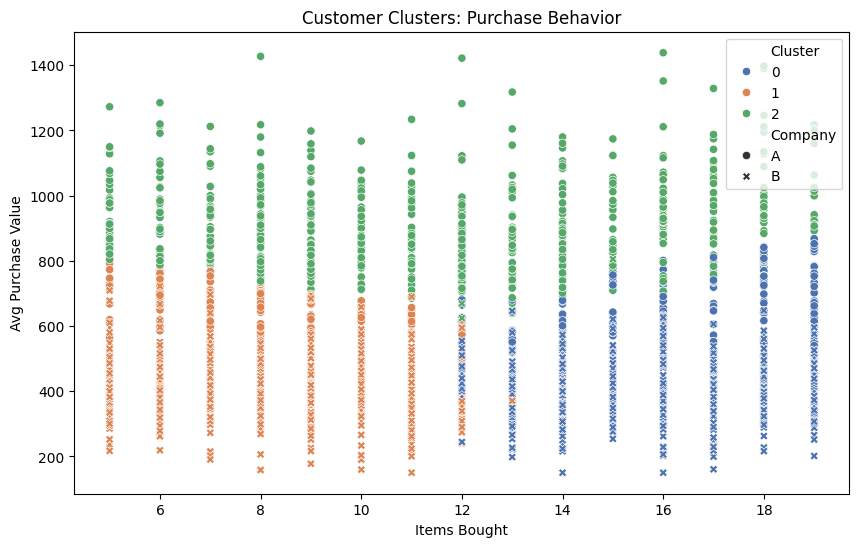

   Cluster Company  count          mean           sum
0        0       A    202  10431.083062  2.107079e+06
1        0       B    490   6291.020212  3.082600e+06
2        1       A    179   4702.433124  8.417355e+05
3        1       B    507   3318.664536  1.682563e+06
4        2       A    619  10724.626622  6.638544e+06
5        2       B      3   9201.068398  2.760321e+04


In [ ]:
# 🔧 Install if needed
!pip install pandas scikit-learn matplotlib seaborn --quiet

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🧪 Simulate customer data
np.random.seed(42)

n_customers = 1000

# Company A: more high spenders
companyA = pd.DataFrame({
    'Company': ['A'] * n_customers,
    'Age': np.random.randint(20, 50, size=n_customers),
    'Income': np.random.randint(30000, 100000, size=n_customers),
    'Items Bought': np.random.randint(5, 20, size=n_customers),
    'Avg Purchase Value': np.random.normal(800, 200, size=n_customers).clip(300, 2000)
})

# Company B: same number of customers but lower spending
companyB = pd.DataFrame({
    'Company': ['B'] * n_customers,
    'Age': np.random.randint(20, 50, size=n_customers),
    'Income': np.random.randint(30000, 100000, size=n_customers),
    'Items Bought': np.random.randint(5, 20, size=n_customers),
    'Avg Purchase Value': np.random.normal(400, 100, size=n_customers).clip(150, 1000)
})

# Combine
df = pd.concat([companyA, companyB], ignore_index=True)

# 🧮 Calculate total spend
df['Total Spend'] = df['Items Bought'] * df['Avg Purchase Value']

# 🎯 Select features for clustering
features = ['Age', 'Income', 'Items Bought', 'Avg Purchase Value']
X = df[features]

# ⚖️ Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🤖 Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Items Bought', y='Avg Purchase Value', hue='Cluster', style='Company', palette='deep')
plt.title("Customer Clusters: Purchase Behavior")
plt.show()

# 🧠 Analyze clusters
cluster_summary = df.groupby(['Cluster', 'Company'])['Total Spend'].agg(['count', 'mean', 'sum']).reset_index()
print(cluster_summary)
